In [30]:
# here i will try to use the same data but with neuronal network to see the results
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.regularizers import l1_l2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import SGD

In [2]:
btc_data= pd.read_csv("btc_data.csv")
btc_data

,timestamp,open,high,low,close,volume
0,2019-09-08,10000.00,10412.65,10000.00,10391.63,3096.291
1,2019-09-09,10316.62,10475.54,10077.22,10307.00,14824.373
2,2019-09-10,10307.00,10382.97,9940.87,10102.02,9068.955
3,2019-09-11,10094.27,10293.11,9884.31,10159.55,10897.922
4,2019-09-12,10163.06,10450.13,10042.12,10415.13,15609.634
...,...,...,...,...,...,...
1551,2023-12-07,43775.10,44066.70,42815.00,43296.00,346421.958
1552,2023-12-08,43296.00,44779.30,43100.00,44209.50,281880.593
1553,2023-12-09,44209.60,44389.20,43555.00,43734.30,189339.656
1554,2023-12-10,43734.20,44099.20,43552.50,43810.00,144548.259


In [3]:
# Convert timestamp to datetime
btc_data['timestamp'] = pd.to_datetime(btc_data['timestamp'])

# # Create the binary features for 7-day and 30-day trends
# btc_data['trend_7_days'] = (btc_data['close'] > btc_data['close'].shift(7)).astype(int).fillna(0)
# btc_data['trend_30_days'] = (btc_data['close'] > btc_data['close'].shift(30)).astype(int).fillna(0)

# # Create the average price columns for the last 7 days and last 30 days
# btc_data['avg_7_days'] = btc_data['close'].rolling(window=7).mean()
# btc_data['avg_30_days'] = btc_data['close'].rolling(window=30).mean()

# btc_data

In [4]:
# # Fill the NaN values for the first 6 days with the value from the 7th day for the 7-day average
# btc_data['avg_7_days'] = btc_data['close'].rolling(window=7, min_periods=1).mean()

# # Fill the NaN values for the first 29 days with the value from the 30th day for the 30-day average
# btc_data['avg_30_days'] = btc_data['close'].rolling(window=30, min_periods=1).mean()


In [5]:
btc_data.isna().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

In [6]:
df = pd.read_csv("price_sentiment.csv")
df

,twitter_bullish,twitter_bearish,reddit_stablecoin,twitter_fomo_theme,twitter_euphoric_excited,reddit_bullish,twitter_pump_and_dump,bitcointalk_recovery,twitter_fork,twitter_use_case_applications,bitcointalk_learning,bitcointalk_adoption,twitter_investing_trading,twitter_dip,log_open,target
0,4.166667,2.916667,0.041667,0.166667,1.541667,1.625000,0.0,0.291667,0.416667,3.125000,0.833333,4.916667,12.375000,0.208333,9.210340,1
1,5.666667,3.333333,0.041667,0.208333,2.666667,1.541667,0.0,0.125000,0.666667,3.958333,1.666667,5.875000,17.166667,0.291667,9.241511,0
2,5.958333,3.041667,0.000000,0.166667,1.833333,1.625000,0.0,0.166667,0.708333,3.083333,1.791667,6.583333,17.291667,0.833333,9.240579,0
3,5.333333,4.625000,0.041667,0.041667,2.375000,1.458333,0.0,0.125000,0.416667,2.833333,1.875000,7.625000,16.750000,0.958333,9.219723,1
4,5.375000,2.875000,0.083333,0.083333,2.666667,1.791667,0.0,0.250000,0.750000,3.250000,1.500000,6.125000,16.333333,0.416667,9.226515,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,1.583333,0.583333,0.041667,0.000000,0.416667,0.833333,0.0,0.000000,0.000000,0.541667,3.166667,5.250000,3.166667,0.125000,10.162693,0
1376,2.250000,0.833333,0.083333,0.000000,0.458333,1.166667,0.0,0.083333,0.083333,0.208333,3.333333,5.875000,3.458333,0.250000,10.131256,1
1377,1.875000,0.333333,0.000000,0.000000,0.583333,1.541667,0.0,0.291667,0.125000,0.583333,3.083333,5.708333,3.375000,0.166667,10.149801,1
1378,1.583333,0.250000,0.000000,0.000000,0.250000,0.958333,0.0,0.041667,0.125000,0.625000,1.791667,4.416667,1.541667,0.000000,10.178688,0


In [7]:

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
predictions = model.predict(X_test_scaled)
predictions = [1 if p > 0.5 else 0 for p in predictions]



Epoch 1/10


35/35 [==============================] - 1s 883us/step - loss: 0.6909 - accuracy: 0.5272
Epoch 2/10
35/35 [==============================] - 0s 736us/step - loss: 0.6861 - accuracy: 0.5335
Epoch 3/10
35/35 [==============================] - 0s 707us/step - loss: 0.6822 - accuracy: 0.5643
Epoch 4/10
35/35 [==============================] - 0s 707us/step - loss: 0.6756 - accuracy: 0.5752
Epoch 5/10
35/35 [==============================] - 0s 677us/step - loss: 0.6685 - accuracy: 0.5960
Epoch 6/10
35/35 [==============================] - 0s 677us/step - loss: 0.6631 - accuracy: 0.5996
Epoch 7/10
35/35 [==============================] - 0s 677us/step - loss: 0.6556 - accuracy: 0.6087
Epoch 8/10
35/35 [==============================] - 0s 677us/step - loss: 0.6574 - accuracy: 0.6005
Epoch 9/10
35/35 [==============================] - 0s 707us/step - loss: 0.6492 - accuracy: 0.6105
Epoch 10/10
9/9 [==============================] - 0s 751us/step


In [8]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluates the performance of a Keras model, prints the precision, recall, F1 score,
    AUC-ROC, and plots the ROC curve and confusion matrix.
    
    Parameters:
    - model: The trained Keras model to evaluate.
    - X_test: Test features.
    - y_test: True labels for the test data.
    """
    # Predict the probabilities for the positive class
    y_pred_probs = model.predict(X_test).ravel()
    # Convert probabilities to class labels based on a 0.5 threshold
    y_pred = (y_pred_probs > 0.5).astype('int32')

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate the AUC-ROC
    auc_roc = roc_auc_score(y_test, y_pred_probs)

    # Print the scores
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'AUC-ROC: {auc_roc:.2f}')

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Assign values from the confusion matrix to variables for clarity
    true_negatives, false_positives, false_negatives, true_positives = cm.ravel()
    
    # Print the interpretations
    print(f'True Negatives (Actual Red Days Correctly Predicted): {true_negatives}')
    print(f'False Positives (Green Days Incorrectly Predicted as Red): {false_positives}')
    print(f'True Positives (Actual Green Days Correctly Predicted): {true_positives}')
    print(f'False Negatives (Red Days Incorrectly Predicted as Green): {false_negatives}')

    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return precision, recall, f1, auc_roc

9/9 [==============================] - 0s 626us/step
Precision: 0.60
Recall: 0.79
F1 Score: 0.68
AUC-ROC: 0.61
True Negatives (Actual Red Days Correctly Predicted): 43
False Positives (Green Days Incorrectly Predicted as Red): 80
True Positives (Actual Green Days Correctly Predicted): 121
False Negatives (Red Days Incorrectly Predicted as Green): 32


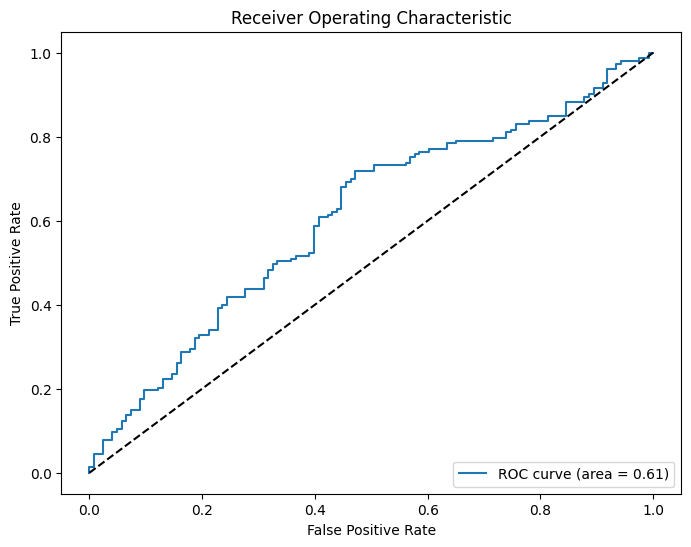

In [9]:
precision, recall, f1, auc_roc = evaluate_model(model, X_test_scaled, y_test)

## try with the indicators 

In [10]:
btc_indicators = pd.read_csv("btc_indicators.csv")

In [11]:
btc_indicators.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'SMA_50',
       'EMA_50', 'SMA_100', 'EMA_100', 'SMA_200', 'EMA_200', 'MACD',
       'MACD_signal', 'RSI', 'middle_band', 'upper_band', 'lower_band', 'ATR',
       '%K', 'VWAP', 'OBV', '%R'],
      dtype='object')

In [12]:
btc_indicators = btc_indicators.drop(["timestamp","open"],axis=1)

In [13]:
df.isna().sum()

twitter_bullish                  0
twitter_bearish                  0
reddit_stablecoin                0
twitter_fomo_theme               0
twitter_euphoric_excited         0
reddit_bullish                   0
twitter_pump_and_dump            0
bitcointalk_recovery             0
twitter_fork                     0
twitter_use_case_applications    0
bitcointalk_learning             0
bitcointalk_adoption             0
twitter_investing_trading        0
twitter_dip                      0
log_open                         0
target                           0
dtype: int64

In [14]:
indicators_sentiment = pd.concat([btc_indicators,df],axis=1)

In [15]:
indicators_sentiment.dropna(inplace=True)

In [16]:
indicators_sentiment.isna().sum()

high                             0
low                              0
close                            0
volume                           0
SMA_50                           0
EMA_50                           0
SMA_100                          0
EMA_100                          0
SMA_200                          0
EMA_200                          0
MACD                             0
MACD_signal                      0
RSI                              0
middle_band                      0
upper_band                       0
lower_band                       0
ATR                              0
%K                               0
VWAP                             0
OBV                              0
%R                               0
twitter_bullish                  0
twitter_bearish                  0
reddit_stablecoin                0
twitter_fomo_theme               0
twitter_euphoric_excited         0
reddit_bullish                   0
twitter_pump_and_dump            0
bitcointalk_recovery

In [17]:
indicators_sentiment.to_csv("indicators_sentiment.csv",index=False)

In [18]:

# Separate features and target
X = indicators_sentiment.drop('target', axis=1)
y = indicators_sentiment['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
predictions = model.predict(X_test_scaled)
predictions = [1 if p > 0.5 else 0 for p in predictions]

Epoch 1/10
30/30 [==============================] - 0s 758us/step - loss: 0.6789 - accuracy: 0.5498
Epoch 2/10
30/30 [==============================] - 0s 725us/step - loss: 0.6684 - accuracy: 0.5943
Epoch 3/10
30/30 [==============================] - 0s 690us/step - loss: 0.6623 - accuracy: 0.5922
Epoch 4/10
30/30 [==============================] - 0s 725us/step - loss: 0.6697 - accuracy: 0.5742
Epoch 5/10
30/30 [==============================] - 0s 725us/step - loss: 0.6567 - accuracy: 0.6017
Epoch 6/10
30/30 [==============================] - 0s 725us/step - loss: 0.6553 - accuracy: 0.5985
Epoch 7/10
30/30 [==============================] - 0s 690us/step - loss: 0.6546 - accuracy: 0.5890
Epoch 8/10
30/30 [==============================] - 0s 690us/step - loss: 0.6537 - accuracy: 0.5869
Epoch 9/10
30/30 [==============================] - 0s 725us/step - loss: 0.6470 - accuracy: 0.6017
Epoch 10/10
8/8 [==============================] - 0s 715us/step


8/8 [==============================] - 0s 572us/step
Precision: 0.66
Recall: 0.63
F1 Score: 0.65
AUC-ROC: 0.67
True Negatives (Actual Red Days Correctly Predicted): 61
False Positives (Green Days Incorrectly Predicted as Red): 43
True Positives (Actual Green Days Correctly Predicted): 84
False Negatives (Red Days Incorrectly Predicted as Green): 49


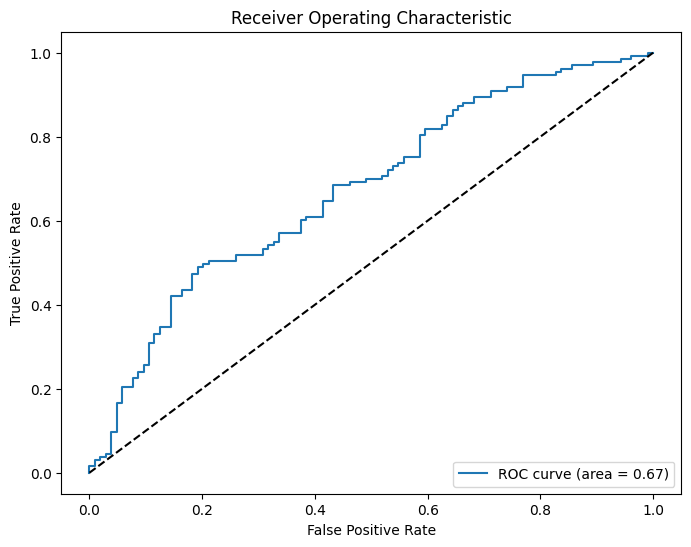

In [19]:
precision, recall, f1, auc_roc = evaluate_model(model, X_test_scaled, y_test)

In [20]:
# test with the all_together csv
all_df = pd.read_csv("all_together.csv")

In [21]:
# Separate features and target
X = all_df.drop('target', axis=1)
y = all_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
predictions = model.predict(X_test_scaled)
predictions = [1 if p > 0.5 else 0 for p in predictions]

Epoch 1/10
35/35 [==============================] - 0s 765us/step - loss: 0.6820 - accuracy: 0.5516
Epoch 2/10
35/35 [==============================] - 0s 677us/step - loss: 0.6695 - accuracy: 0.5815
Epoch 3/10
35/35 [==============================] - 0s 677us/step - loss: 0.6625 - accuracy: 0.6014
Epoch 4/10
35/35 [==============================] - 0s 677us/step - loss: 0.6598 - accuracy: 0.5879
Epoch 5/10
35/35 [==============================] - 0s 677us/step - loss: 0.6549 - accuracy: 0.6005
Epoch 6/10
35/35 [==============================] - 0s 677us/step - loss: 0.6495 - accuracy: 0.6232
Epoch 7/10
35/35 [==============================] - 0s 677us/step - loss: 0.6464 - accuracy: 0.6196
Epoch 8/10
35/35 [==============================] - 0s 677us/step - loss: 0.6428 - accuracy: 0.6150
Epoch 9/10
35/35 [==============================] - 0s 677us/step - loss: 0.6396 - accuracy: 0.6178
Epoch 10/10
9/9 [==============================] - 0s 751us/step


9/9 [==============================] - 0s 625us/step
Precision: 0.62
Recall: 0.64
F1 Score: 0.63
AUC-ROC: 0.61
True Negatives (Actual Red Days Correctly Predicted): 63
False Positives (Green Days Incorrectly Predicted as Red): 60
True Positives (Actual Green Days Correctly Predicted): 98
False Negatives (Red Days Incorrectly Predicted as Green): 55


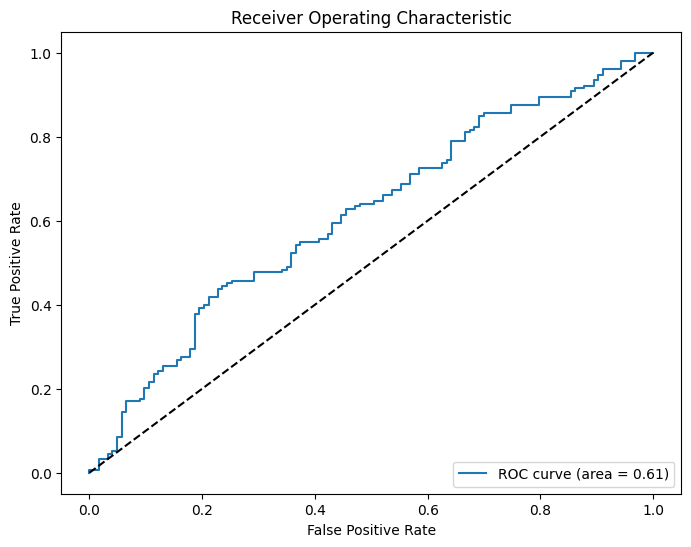

In [22]:
precision, recall, f1, auc_roc = evaluate_model(model, X_test_scaled, y_test)

In [28]:
#ok lets go with some heavy metal
# Function to create and compile a model
def create_compile_model(optimizer='adam', neurons=32, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Hyperparameter space
optimizers = ['adam', 'sgd']
neurons = [32, 64, 128]
activations = ['relu', 'tanh']
batch_sizes = [32, 64, 128]
epochs = [10, 20, 30]

best_score = 0
best_params = {}

# Grid search loop
for optimizer in optimizers:
    for neuron in neurons:
        for activation in activations:
            for batch_size in batch_sizes:
                for epoch in epochs:
                    # Create and compile a new model
                    model = create_compile_model(optimizer=optimizer, neurons=neuron, activation=activation)
                    # Fit the model
                    model.fit(X_train_scaled, y_train, epochs=epoch, batch_size=batch_size, verbose=0)
                    # Make predictions and evaluate
                    predictions = model.predict(X_test_scaled)
                    predictions = [1 if p > 0.5 else 0 for p in predictions]
                    score = accuracy_score(y_test, predictions)
                    # Check if this is the best score so far
                    if score > best_score:
                        best_score = score
                        best_params = {'optimizer': optimizer, 'neurons': neuron, 'activation': activation, 'batch_size': batch_size, 'epochs': epoch}

# Print best score and parameters
print(f"Best Score: {best_score}")
print(f"Best Hyperparameters: {best_params}")

9/9 [==============================] - 0s 626us/step
Best Score: 0.6231884057971014
Best Hyperparameters: {'optimizer': 'sgd', 'neurons': 32, 'activation': 'tanh', 'batch_size': 64, 'epochs': 30}


In [31]:
# test with the wining hyperparameters
# Assuming you have already prepared your dataset 'all_df'
X = all_df.drop('target', axis=1)
y = all_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model with the specified hyperparameters
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='tanh'))  # 32 neurons with tanh activation
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model with SGD optimizer
model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# Train the model with the specified batch size and number of epochs
model.fit(X_train_scaled, y_train, epochs=30, batch_size=64, verbose=1)

# Evaluate the model on the test set
predictions = model.predict(X_test_scaled)
predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, predictions)

print(f"Test Accuracy: {accuracy}")

Epoch 1/30
18/18 [==============================] - 0s 824us/step - loss: 0.7443 - accuracy: 0.4801
Epoch 2/30
18/18 [==============================] - 0s 707us/step - loss: 0.7225 - accuracy: 0.4928
Epoch 3/30
18/18 [==============================] - 0s 707us/step - loss: 0.7079 - accuracy: 0.5127
Epoch 4/30
18/18 [==============================] - 0s 707us/step - loss: 0.6974 - accuracy: 0.5290
Epoch 5/30
18/18 [==============================] - 0s 707us/step - loss: 0.6892 - accuracy: 0.5471
Epoch 6/30
18/18 [==============================] - 0s 707us/step - loss: 0.6825 - accuracy: 0.5643
Epoch 7/30
18/18 [==============================] - 0s 707us/step - loss: 0.6763 - accuracy: 0.5734
Epoch 8/30
18/18 [==============================] - 0s 706us/step - loss: 0.6712 - accuracy: 0.5861
Epoch 9/30
18/18 [==============================] - 0s 706us/step - loss: 0.6670 - accuracy: 0.5851
Epoch 10/30
18/18 [==============================] - 0s 707us/step - loss: 0.6636 - accuracy: 0.5870

9/9 [==============================] - 0s 626us/step
Precision: 0.63
Recall: 0.56
F1 Score: 0.59
AUC-ROC: 0.63
True Negatives (Actual Red Days Correctly Predicted): 72
False Positives (Green Days Incorrectly Predicted as Red): 51
True Positives (Actual Green Days Correctly Predicted): 86
False Negatives (Red Days Incorrectly Predicted as Green): 67


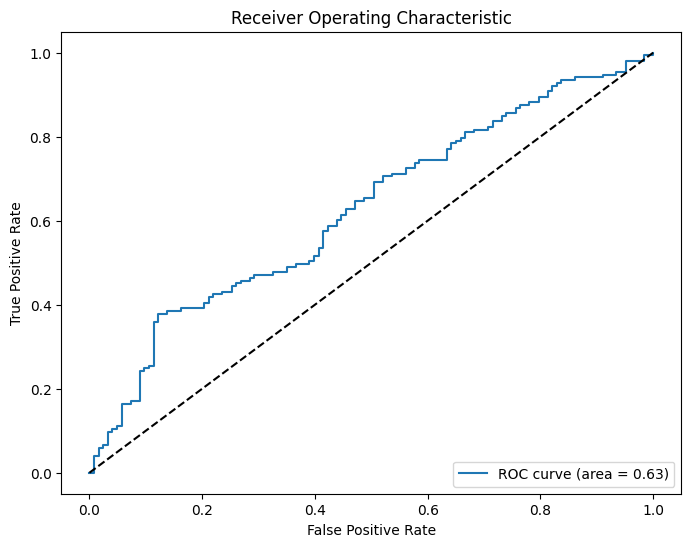

In [32]:
precision, recall, f1, auc_roc = evaluate_model(model, X_test_scaled, y_test)

In [ ]:
# well i gues i will just keep using predictive models instead of neuronal network since it seems that they do better for this job


### First impresions sentiment only with open price
+ Precision: 0.63
+ Recall: 0.58
+ F1 Score: 0.60
+ AUC-ROC: 0.61
+ True Negatives (Actual Red Days Correctly Predicted): 72
+ False Positives (Green Days Incorrectly Predicted as Red): 51
+ True Positives (Actual Green Days Correctly Predicted): 88
+ False Negatives (Red Days Incorrectly Predicted as Green): 65

+ overall score invented by me which is precision + f1 +auc-roc / 3
+ overall score 0.61

### with sentiment features
+ Precision: 0.65
+ Recall: 0.67
+ F1 Score: 0.66
+ AUC-ROC: 0.62
+ True Negatives (Actual Red Days Correctly Predicted): 67
+ False Positives (Green Days Incorrectly Predicted as Red): 56
+ True Positives (Actual Green Days Correctly Predicted): 103
+ False Negatives (Red Days Incorrectly Predicted as Green): 50

+ overall score 0.64

### with indicators
+ Precision: 0.64
+ Recall: 0.63
+ F1 Score: 0.64
+ AUC-ROC: 0.62
+ True Negatives (Actual Red Days Correctly Predicted): 70
+ False Positives (Green Days Incorrectly Predicted as Red): 53
+ True Positives (Actual Green Days Correctly Predicted): 96
+ False Negatives (Red Days Incorrectly Predicted as Green): 57
+ overall score 0.63

### with everything 
+ Precision: 0.66
+ Recall: 0.56
+ F1 Score: 0.61
+ AUC-ROC: 0.63
+ True Negatives (Actual Red Days Correctly Predicted): 79
+ False Positives (Green Days Incorrectly Predicted as Red): 44
+ True Positives (Actual Green Days Correctly Predicted): 86
+ False Negatives (Red Days Incorrectly Predicted as Green): 67

+ overall score 0.63